# Q2 a

(a) Implementing DNNs - Use the PyTorch package to implement a DNN model with 2
and 3 hidden layers. Each hidden layer contains 512 neurons. What is the performance on the test dataset for this classifier

# DNN model with 2 layers

Model is train for 10 epochs. 

Training accuracy is 0.9944.

Test accuracy is 0.9793.

# DNN model with 3 layers.

Training accuracy is 0.9959

Test accuracy is 0.9795


Both models have nearly same performance 

# Q2 b

(b) Implementing CNNs - Use the same package to implement a CNN model with one
layer of convolutions (kernel size of 3 × 3 with a 2-D convolutional layer and having
128 filters) followed by two dense layers of 256 neurons. Compare the performance
of the CNN with the DNN.

CNN model with 128 filters followed by two dense layer of 256 neurons

Model is train for 10 epochs. 

Training accuracy is 0.9900 

Test accuracy is 0.9734.

CNN model and DNN models have nearly same performance.

# Q2 c

(c) Provide your answers with analysis, plots for various choices of hidden layer dimen-
sions and filter sizes in the CNN.

# Performance with Various choice of hidden layer dimension

Number of filters = 128 

hidden layer dimension -----------Training accuracy----------Test accuracy 

    256                     0.9900              0.9734
    128                     0.9902              0.9709
    64                      0.9874              0.9667
    32                      0.9800              0.9592

# Performance with Various choice of filter size

CNN model:

Number of neurons in hidden layer = 256
Number of filters = 128

filter Size --------------------Training accuracy------------Test accuracy 

    4 x 4               0.9887              0.9705
    3 X 3               0.9900              0.9734
    2 X 2               0.9907              0.9722   
    
Accuracy reamins nearly same after 10 iterations.  

# Performance with Various choice of number of filters 

CNN model:

Number of neurons in hidden layer = 256

Number of filters----------------Training accuracy------------Test accuracy 

    128                     0.9900              0.9734
    64                      0.9916              0.9729
    32                      0.9935              0.9765
    16                      0.9946              0.9778
    
 With decrease in number of filters, performance of models improves.  

Observations:

    1. Change in number of filters does not affect the performance of models
    
    2. Change in number of dimention of dense layes affect the performance of models

All the required plots are showm below at respective locations.

In [2]:
import gzip
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten,Activation
from keras import backend as k

# Loading data

In [4]:
def load_images(file_name):
    with gzip.open(file_name, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        #train_images = torch.from_numpy(train_images)
    return images
    

In [5]:
def load_label(file_name):
    with gzip.open(file_name, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels    

In [6]:
def plot_two(x1,x2,lab1,lab2,x_label, y_label,location,title):
    plt.plot(x1, label=lab1)
    plt.plot(x2, label = lab2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim([0.9, 1])
    plt.legend(loc=location)
    plt.title(title)
    plt.show()

# Reading data 

In [11]:
train_images = load_images("train-images-idx3-ubyte.gz")
test_images = load_images("t10k-images-idx3-ubyte.gz")

train_labels = load_label("train-labels-idx1-ubyte.gz")
test_labels = load_label("t10k-labels-idx1-ubyte.gz")

In [12]:
train_images.shape

(60000, 28, 28)

In [59]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


# Data preprocessing 

# Conversion of label vector to one hot vector 

In [14]:
def one_hot(labels):
    x = len(labels)
    Y = np.zeros((10,x))
    for i in range(x):
        X = Y[:,i]
        #X = X.reshape(10,1)
        f = labels[i]
        X[f] = 1
        Y[:,i] = X
    return Y

In [15]:
train_label = one_hot(train_labels)
test_label = one_hot(test_labels)

In [16]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [17]:
train_images /=255.0
test_images /=255.0

In [18]:
print(test_label.shape)
print(test_images.shape)

(10, 10000)
(10000, 28, 28)


In [19]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [20]:
len(test_labels)

10000

# Q2 a

Implementing DNNs - Use the PyTorch package to implement a DNN model with 2
and 3 hidden layers. Each hidden layer contains 512 neurons. What is the perfor-
mance on the test dataset for this classifier

# 2 hidden layer 

In [53]:
model2 = tf.keras.Sequential()

model2.add(Flatten(input_shape=(28, 28)))

# Hidden layer
model2.add(tf.keras.layers.Dense(512, activation='relu'))
model2.add(tf.keras.layers.Dense(512, activation='relu'))

# Output layer
model2.add(Dense(10,activation='softmax'))

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [54]:
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history2 = model2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1828 - accuracy: 0.9442 - val_loss: 0.1075 - val_accuracy: 0.9674
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0795 - accuracy: 0.9743 - val_loss: 0.0782 - val_accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0569 - accuracy: 0.9820 - val_loss: 0.0871 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0769 - val_accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0928 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.1027 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0851 - val_ac

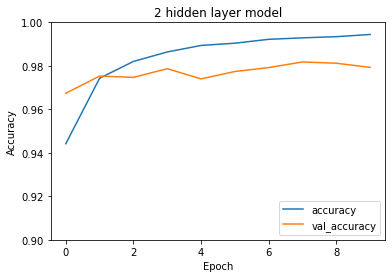

In [55]:
plot_two(history2.history['accuracy'],history2.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"2 hidden layer model")

In [56]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 1s - loss: 0.1114 - accuracy: 0.9793 - 719ms/epoch - 2ms/step
Test accuracy is  0.9793000221252441


# 3 hidden layer

In [29]:
model3 = tf.keras.Sequential()

# Input layer
model3.add(Flatten(input_shape=(28, 28)))

# Hidden layer
model3.add(tf.keras.layers.Dense(512, activation='relu'))
model3.add(tf.keras.layers.Dense(512, activation='relu'))
model3.add(tf.keras.layers.Dense(512, activation='relu'))

# Output layer
model3.add(Dense(10,activation='softmax'))

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [32]:
model3.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history3 = model3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0291 - accuracy: 0.9927 - val_loss: 0.1332 - val_accuracy: 0.9794
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0230 - accuracy: 0.9940 - val_loss: 0.1301 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0210 - accuracy: 0.9947 - val_loss: 0.1255 - val_accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0232 - accuracy: 0.9940 - val_loss: 0.1237 - val_accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0216 - accuracy: 0.9949 - val_loss: 0.1427 - val_accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0190 - accuracy: 0.9948 - val_loss: 0.1638 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0174 - accuracy: 0.9959 - val_loss: 0.1351 - val_ac

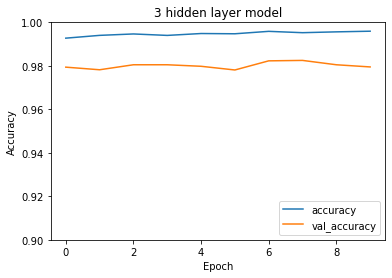

In [33]:
plot_two(history3.history['accuracy'],history3.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"3 hidden layer model")

In [57]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 1s - loss: 0.1557 - accuracy: 0.9795 - 973ms/epoch - 3ms/step
Test accuracy is  0.9794999957084656


# Q2 b

Implementing CNNs - Use the same package to implement a CNN model with one
layer of convolutions (kernel size of 3 × 3 with a 2-D convolutional layer and having
128 filters) followed by two dense layers of 256 neurons.

In [22]:
model128 = Sequential()

# Hidden layer
model128.add(Conv2D(128,(3,3),strides=1,input_shape=(28,28,1)))
model128.add(Flatten())
model128.add(Dense(256,activation='relu'))
model128.add(Dense(256,activation='relu'))

# Output layer
model128.add(Dense(10,activation='softmax'))

In [23]:
model128.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 flatten (Flatten)           (None, 86528)             0         
                                                                 
 dense (Dense)               (None, 256)               22151424  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 22,221,066
Trainable params: 22,221,066
Non-trainable params: 0
_________________________________________________________________


In [24]:
model128.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history128 = model128.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 357s 190ms/step - loss: 0.1954 - accuracy: 0.9406 - val_loss: 0.1410 - val_accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 357s 190ms/step - loss: 0.0978 - accuracy: 0.9695 - val_loss: 0.0969 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 357s 190ms/step - loss: 0.0772 - accuracy: 0.9764 - val_loss: 0.0997 - val_accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 355s 190ms/step - loss: 0.0642 - accuracy: 0.9808 - val_loss: 0.0999 - val_accuracy: 0.9718
Epoch 5/10
1875/1875 [==============================] - 337s 180ms/step - loss: 0.0523 - accuracy: 0.9843 - val_loss: 0.1104 - val_accuracy: 0.9709
Epoch 6/10
1875/1875 [==============================] - 285s 152ms/step - loss: 0.0528 - accuracy: 0.9845 - val_loss: 0.1237 - val_accuracy: 0.9729
Epoch 7/10
1875/1875 [==============================] - 278s 148ms/step - loss: 0.0443 - accuracy: 0.9874 - val_loss: 0.135

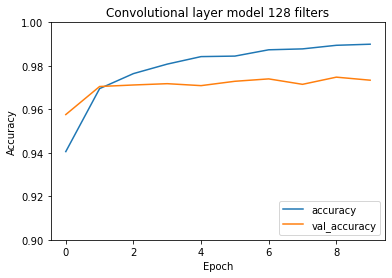

In [27]:
plot_two(history128.history['accuracy'],history128.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"Convolutional layer model 128 filters")

In [28]:
test_loss, test_acc = model128.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 6s - loss: 0.1652 - accuracy: 0.9734 - 6s/epoch - 20ms/step
Test accuracy is  0.9733999967575073


# Q2 c

# Variation of Filter size

# Filter size = 2 X 2

In [61]:
model128_2 = Sequential()

# Hidden layer
model128_2.add(Conv2D(128,(2,2),strides=1,input_shape=(28,28,1)))
model128_2.add(Flatten())
model128_2.add(Dense(256,activation='relu'))
model128_2.add(Dense(256,activation='relu'))

# Output layer
model128_2.add(Dense(10,activation='softmax'))

model128_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 27, 27, 128)       640       
                                                                 
 flatten_9 (Flatten)         (None, 93312)             0         
                                                                 
 dense_28 (Dense)            (None, 256)               23888128  
                                                                 
 dense_29 (Dense)            (None, 256)               65792     
                                                                 
 dense_30 (Dense)            (None, 10)                2570      
                                                                 
Total params: 23,957,130
Trainable params: 23,957,130
Non-trainable params: 0
_________________________________________________________________


In [62]:
model128_2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history128_2 = model128_2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 330s 176ms/step - loss: 0.1978 - accuracy: 0.9395 - val_loss: 0.1023 - val_accuracy: 0.9676
Epoch 2/10
1875/1875 [==============================] - 319s 170ms/step - loss: 0.0975 - accuracy: 0.9694 - val_loss: 0.1126 - val_accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 2291s 1s/step - loss: 0.0731 - accuracy: 0.9775 - val_loss: 0.1052 - val_accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 326s 174ms/step - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.1068 - val_accuracy: 0.9713
Epoch 5/10
1875/1875 [==============================] - 344s 184ms/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.1175 - val_accuracy: 0.9701
Epoch 6/10
1875/1875 [==============================] - 341s 182ms/step - loss: 0.0498 - accuracy: 0.9854 - val_loss: 0.1145 - val_accuracy: 0.9748
Epoch 7/10
1875/1875 [==============================] - 321s 171ms/step - loss: 0.0378 - accuracy: 0.9888 - val_loss: 0.1433 

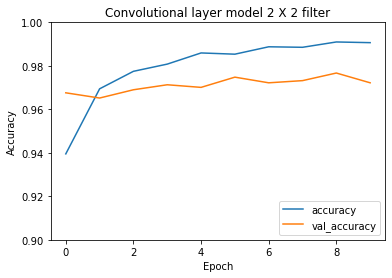

In [69]:
plot_two(history128_2.history['accuracy'],history128_2.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"Convolutional layer model 2 X 2 filter")

In [64]:
test_loss, test_acc = model128_2.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 8s - loss: 0.1907 - accuracy: 0.9722 - 8s/epoch - 25ms/step
Test accuracy is  0.9721999764442444


# Filter size = 4 X 4

In [65]:
model128_4 = Sequential()

# Hidden layer
model128_4.add(Conv2D(128,(4,4),strides=1,input_shape=(28,28,1)))
model128_4.add(Flatten())
model128_4.add(Dense(256,activation='relu'))
model128_4.add(Dense(256,activation='relu'))

# Output layer
model128_4.add(Dense(10,activation='softmax'))

model128_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 25, 25, 128)       2176      
                                                                 
 flatten_10 (Flatten)        (None, 80000)             0         
                                                                 
 dense_31 (Dense)            (None, 256)               20480256  
                                                                 
 dense_32 (Dense)            (None, 256)               65792     
                                                                 
 dense_33 (Dense)            (None, 10)                2570      
                                                                 
Total params: 20,550,794
Trainable params: 20,550,794
Non-trainable params: 0
_________________________________________________________________


In [66]:
model128_4.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history128_4 = model128_4.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 269s 144ms/step - loss: 0.1938 - accuracy: 0.9413 - val_loss: 0.1012 - val_accuracy: 0.9687
Epoch 2/10
1875/1875 [==============================] - 269s 143ms/step - loss: 0.1054 - accuracy: 0.9683 - val_loss: 0.1020 - val_accuracy: 0.9683
Epoch 3/10
1875/1875 [==============================] - 266s 142ms/step - loss: 0.0789 - accuracy: 0.9764 - val_loss: 0.1088 - val_accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 273s 146ms/step - loss: 0.0714 - accuracy: 0.9790 - val_loss: 0.1004 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 272s 145ms/step - loss: 0.0655 - accuracy: 0.9811 - val_loss: 0.1015 - val_accuracy: 0.9736
Epoch 6/10
1875/1875 [==============================] - 260s 139ms/step - loss: 0.0545 - accuracy: 0.9845 - val_loss: 0.1374 - val_accuracy: 0.9691
Epoch 7/10
1875/1875 [==============================] - 260s 139ms/step - loss: 0.0515 - accuracy: 0.9855 - val_

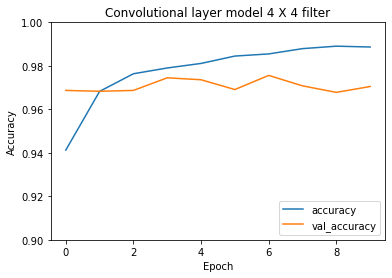

In [70]:
plot_two(history128_4.history['accuracy'],history128_4.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"Convolutional layer model 4 X 4 filter")

In [68]:
test_loss, test_acc = model128_4.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 7s - loss: 0.1786 - accuracy: 0.9705 - 7s/epoch - 22ms/step
Test accuracy is  0.9704999923706055


# Variation of number of filter 

# Number of filters = 64

In [68]:
model64 = Sequential()

# Hidden layer
model64.add(Conv2D(64,(3,3),strides=1,input_shape=(28,28,1)))
model64.add(Flatten())
model64.add(Dense(256,activation='relu'))
model64.add(Dense(256,activation='relu'))

# Output layer
model64.add(Dense(10,activation='softmax'))

model64.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 flatten_4 (Flatten)         (None, 43264)             0         
                                                                 
 dense_13 (Dense)            (None, 256)               11075840  
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 11,144,842
Trainable params: 11,144,842
Non-trainable params: 0
_________________________________________________________________


In [72]:
model64.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history64 = model64.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.1883 - accuracy: 0.9424 - val_loss: 0.1052 - val_accuracy: 0.9661
Epoch 2/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0892 - accuracy: 0.9716 - val_loss: 0.0963 - val_accuracy: 0.9734
Epoch 3/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0678 - accuracy: 0.9788 - val_loss: 0.1135 - val_accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0943 - val_accuracy: 0.9737
Epoch 5/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.1041 - val_accuracy: 0.9748
Epoch 6/10
1875/1875 [==============================] - 179s 95ms/step - loss: 0.0400 - accuracy: 0.9883 - val_loss: 0.1378 - val_accuracy: 0.9691
Epoch 7/10
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0342 - accuracy: 0.9900 - val_loss: 0

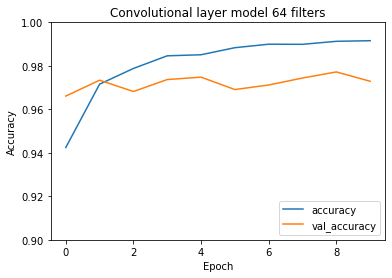

In [73]:
plot_two(history64.history['accuracy'],history64.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"Convolutional layer model 64 filters")

In [74]:
test_loss, test_acc = model64.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 6s - loss: 0.1709 - accuracy: 0.9729 - 6s/epoch - 18ms/step
Test accuracy is  0.9728999733924866


# Number of filters = 32

In [75]:
model32 = Sequential()

# Hidden layer
model32.add(Conv2D(32,(3,3),strides=1,input_shape=(28,28,1)))
model32.add(Flatten())
model32.add(Dense(256,activation='relu'))
model32.add(Dense(256,activation='relu'))

# Output layer
model32.add(Dense(10,activation='softmax'))

model32.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_5 (Flatten)         (None, 21632)             0         
                                                                 
 dense_16 (Dense)            (None, 256)               5538048   
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dense_18 (Dense)            (None, 10)                2570      
                                                                 
Total params: 5,606,730
Trainable params: 5,606,730
Non-trainable params: 0
_________________________________________________________________


In [80]:
model32.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history32 = model32.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1861 - accuracy: 0.9436 - val_loss: 0.1177 - val_accuracy: 0.9632
Epoch 2/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0828 - accuracy: 0.9741 - val_loss: 0.0991 - val_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0592 - accuracy: 0.9812 - val_loss: 0.0870 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.1122 - val_accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.1028 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0970 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.1106 -

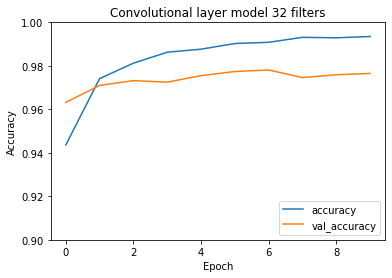

In [81]:
plot_two(history32.history['accuracy'],history32.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"Convolutional layer model 32 filters")

In [82]:
test_loss, test_acc = model32.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 2s - loss: 0.1456 - accuracy: 0.9765 - 2s/epoch - 6ms/step
Test accuracy is  0.9764999747276306


# Number of filters = 16

In [76]:
model16 = Sequential()

# Hidden layer
model16.add(Conv2D(16,(3,3),strides=1,input_shape=(28,28,1)))
model16.add(Flatten())
model16.add(Dense(256,activation='relu'))
model16.add(Dense(256,activation='relu'))

# Output layer
model16.add(Dense(10,activation='softmax'))

model16.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 flatten_6 (Flatten)         (None, 10816)             0         
                                                                 
 dense_19 (Dense)            (None, 256)               2769152   
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                                 
Total params: 2,837,674
Trainable params: 2,837,674
Non-trainable params: 0
_________________________________________________________________


In [77]:
model16.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history16 = model16.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1830 - accuracy: 0.9440 - val_loss: 0.1012 - val_accuracy: 0.9697
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0846 - accuracy: 0.9735 - val_loss: 0.0805 - val_accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.0916 - val_accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.0864 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0310 - accuracy: 0.9896 - val_loss: 0.1102 - val_accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.1020 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.1097 -

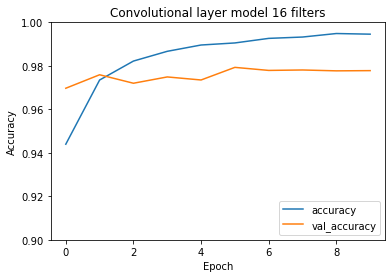

In [78]:
plot_two(history16.history['accuracy'],history16.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"Convolutional layer model 16 filters")

In [79]:
test_loss, test_acc = model16.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 1s - loss: 0.1195 - accuracy: 0.9778 - 1s/epoch - 3ms/step
Test accuracy is  0.9778000116348267


# Variation of hidden layer dimension

# Hidden layer dimension = 128

In [38]:
model_128 = Sequential()

# Hidden layer
model_128.add(Conv2D(128,(3,3),strides=1,input_shape=(28,28,1)))
model_128.add(Flatten())
model_128.add(Dense(128,activation='relu'))
model_128.add(Dense(128,activation='relu'))

# Output layer
model_128.add(Dense(10,activation='softmax'))

model_128.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 flatten_3 (Flatten)         (None, 86528)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               11075712  
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 11,094,794
Trainable params: 11,094,794
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_128.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history_128 = model_128.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.2091 - accuracy: 0.9366 - val_loss: 0.1221 - val_accuracy: 0.9643
Epoch 2/10
1875/1875 [==============================] - 145s 78ms/step - loss: 0.1040 - accuracy: 0.9688 - val_loss: 0.1003 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 138s 73ms/step - loss: 0.0840 - accuracy: 0.9738 - val_loss: 0.1096 - val_accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0647 - accuracy: 0.9801 - val_loss: 0.1072 - val_accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.0981 - val_accuracy: 0.9738
Epoch 6/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0461 - accuracy: 0.9851 - val_loss: 0.1426 - val_accuracy: 0.9687
Epoch 7/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.0454 - accuracy: 0.9864 - val_loss: 0

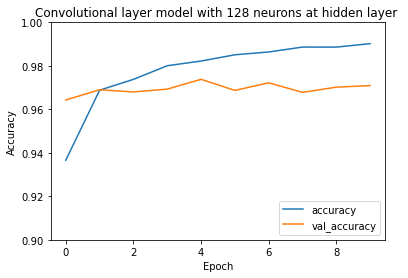

In [40]:
plot_two(history_128.history['accuracy'],history_128.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"Convolutional layer model with 128 neurons at hidden layer ")

In [41]:
test_loss, test_acc = model_128.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 4s - loss: 0.1573 - accuracy: 0.9709 - 4s/epoch - 14ms/step
Test accuracy is  0.9708999991416931


# Hidden layer dimension = 64

In [43]:
model_64 = Sequential()

# Hidden layer
model_64.add(Conv2D(128,(3,3),strides=1,input_shape=(28,28,1)))
model_64.add(Flatten())
model_64.add(Dense(64,activation='relu'))
model_64.add(Dense(64,activation='relu'))

# Output layer
model_64.add(Dense(10,activation='softmax'))

model_64.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 flatten_5 (Flatten)         (None, 86528)             0         
                                                                 
 dense_16 (Dense)            (None, 64)                5537856   
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 5,543,946
Trainable params: 5,543,946
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_64.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history_64 = model_64.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2202 - accuracy: 0.9337 - val_loss: 0.1334 - val_accuracy: 0.9595
Epoch 2/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1219 - accuracy: 0.9625 - val_loss: 0.1180 - val_accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0958 - accuracy: 0.9708 - val_loss: 0.1368 - val_accuracy: 0.9615
Epoch 4/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0831 - accuracy: 0.9742 - val_loss: 0.1280 - val_accuracy: 0.9635
Epoch 5/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0672 - accuracy: 0.9786 - val_loss: 0.1350 - val_accuracy: 0.9626
Epoch 6/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0589 - accuracy: 0.9811 - val_loss: 0.1361 - val_accuracy: 0.9637
Epoch 7/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.1339 -

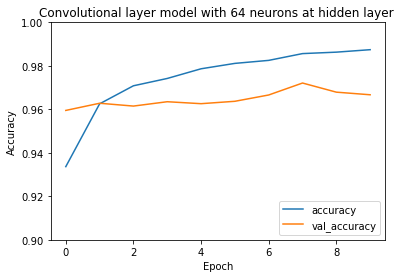

In [45]:
plot_two(history_64.history['accuracy'],history_64.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"Convolutional layer model with 64 neurons at hidden layer ")

In [46]:
test_loss, test_acc = model_64.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 3s - loss: 0.1644 - accuracy: 0.9667 - 3s/epoch - 9ms/step
Test accuracy is  0.96670001745224


# Hidden layer dimension = 32

In [47]:
model_32 = Sequential()

# Hidden layer
model_32.add(Conv2D(128,(3,3),strides=1,input_shape=(28,28,1)))
model_32.add(Flatten())
model_32.add(Dense(32,activation='relu'))
model_32.add(Dense(32,activation='relu'))

# Output layer
model_32.add(Dense(10,activation='softmax'))

model_32.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 flatten_6 (Flatten)         (None, 86528)             0         
                                                                 
 dense_19 (Dense)            (None, 32)                2768928   
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 2,771,594
Trainable params: 2,771,594
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_32.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history_32 = model_32.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2807 - accuracy: 0.9156 - val_loss: 0.1858 - val_accuracy: 0.9455
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1679 - accuracy: 0.9497 - val_loss: 0.1438 - val_accuracy: 0.9593
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1353 - accuracy: 0.9600 - val_loss: 0.1593 - val_accuracy: 0.9519
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1176 - accuracy: 0.9639 - val_loss: 0.1378 - val_accuracy: 0.9600
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1053 - accuracy: 0.9675 - val_loss: 0.1411 - val_accuracy: 0.9588
Epoch 6/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0953 - accuracy: 0.9707 - val_loss: 0.1491 - val_accuracy: 0.9606
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0850 - accuracy: 0.9736 - val_loss: 0.1500 -

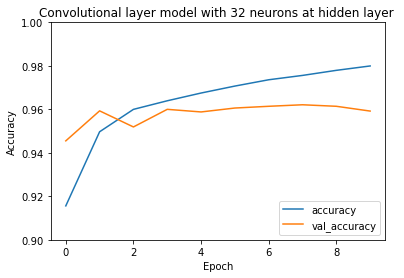

In [49]:
plot_two(history_32.history['accuracy'],history_32.history['val_accuracy'],'accuracy','val_accuracy','Epoch', 'Accuracy','lower right',"Convolutional layer model with 32 neurons at hidden layer ")

In [50]:
test_loss, test_acc = model_32.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy is ",test_acc)

313/313 - 2s - loss: 0.1597 - accuracy: 0.9592 - 2s/epoch - 7ms/step
Test accuracy is  0.9592000246047974
